In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import diffxpy.api as de

In [7]:
print("Scanpy version:", sc.__version__)

Scanpy version: 1.10.4


In [8]:
adata = sc.read("./H5ADfiles/AnnData_GTEx_v10_Testis.h5ad")

In [9]:
#adata1 = adata[(adata.obs.AGE == "60-69") | (adata.obs.AGE == "50-59")]
#adata2 = adata[adata.obs.DTHHRDY == 2]

In [10]:
adata

AnnData object with n_obs × n_vars = 414 × 59033
    obs: 'SMPTHNTS', 'SMTSD', 'SUBJID', 'SEX', 'AGE', 'DTHHRDY'
    var: 'Symbol'

In [11]:
#adata.obs.SUBJID

In [12]:
#adata.obs.SMPTHNTS

In [13]:
myadata = adata
myGenes = myadata.var["Symbol"].to_list()
myadata.var_names = myGenes
myadata.var_names_make_unique()

/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


In [14]:
myadata.X = myadata.X.astype(np.float64)

In [15]:
sc.pp.normalize_total(myadata, target_sum=1e4)
sc.pp.log1p(myadata)

In [16]:
?sc.pp.log1p

Signature:
sc.pp.log1p(
    data: 'AnnData | np.ndarray | spmatrix',
    *,
    base: 'Number | None' = None,
    copy: 'bool' = False,
    chunked: 'bool | None' = None,
    chunk_size: 'int | None' = None,
    layer: 'str | None' = None,
    obsm: 'str | None' = None,
) -> 'AnnData | np.ndarray | spmatrix | None'
Docstring:
Logarithmize the data matrix.

Computes :math:`X = \log(X + 1)`,
where :math:`log` denotes the natural logarithm unless a different base is given.

Parameters
----------
data : 'AnnData | np.ndarray | spmatrix'
    The (annotated) data matrix of shape `n_obs` × `n_vars`.
    Rows correspond to cells and columns to genes.
base : 'Number | None', optional (default: None)
    Base of the logarithm. Natural logarithm is used by default.
copy : 'bool', optional (default: False)
    If an :class:`~anndata.AnnData` is passed, determines whether a copy
    is returned.
chunked : 'bool | None', optional (default: None)
    Process the data matrix in chunks, which will save

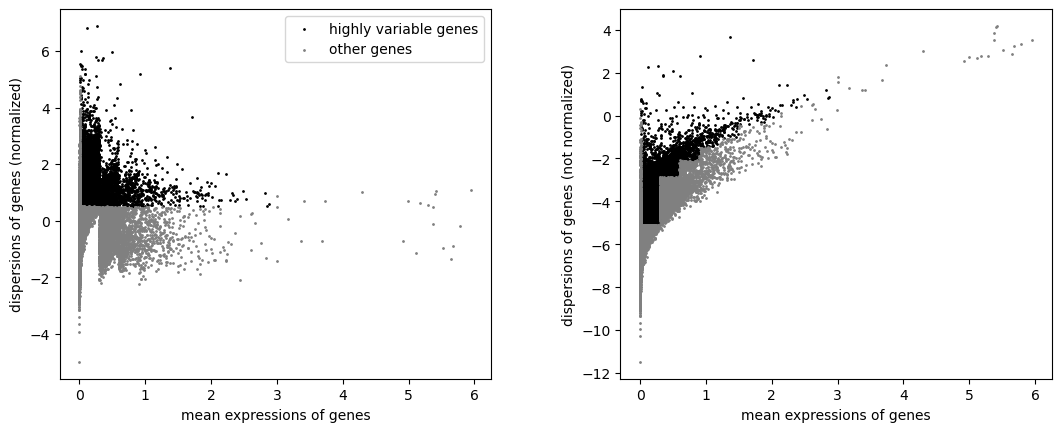

In [17]:
sc.pp.highly_variable_genes(myadata)
sc.pl.highly_variable_genes(myadata)

In [18]:
myadataHV = myadata[:, myadata.var.highly_variable]

In [19]:
sc.pp.scale(myadataHV, max_value=10)

/home/majunyu/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [20]:
sc.tl.pca(myadataHV, svd_solver='arpack')

In [21]:
myadataHV.var

,Symbol,highly_variable,means,dispersions,dispersions_norm,mean,std
WASH7P,WASH7P,True,0.048070,-4.622669,0.905122,0.047855,0.020629
ENSG00000268903,ENSG00000268903,True,0.333077,-2.278588,1.157699,0.323509,0.136049
ENSG00000269981,ENSG00000269981,True,0.446436,-2.088490,1.366632,0.433035,0.161938
DDX11L17,DDX11L17,True,0.035494,-4.771118,0.777343,0.035354,0.016685
WASH9P,WASH9P,True,0.135844,-3.981544,1.456974,0.134820,0.045242
...,...,...,...,...,...,...,...
MT-TC,MT-TC,True,0.018778,-0.512392,4.443069,0.015863,0.065456
MT-TY,MT-TY,True,0.023738,-0.686366,4.293320,0.020674,0.067138
MT-TS1,MT-TS1,True,0.054439,-1.448579,3.637240,0.051066,0.072320
MT-TE,MT-TE,True,0.035532,-2.388180,2.828473,0.034293,0.047327


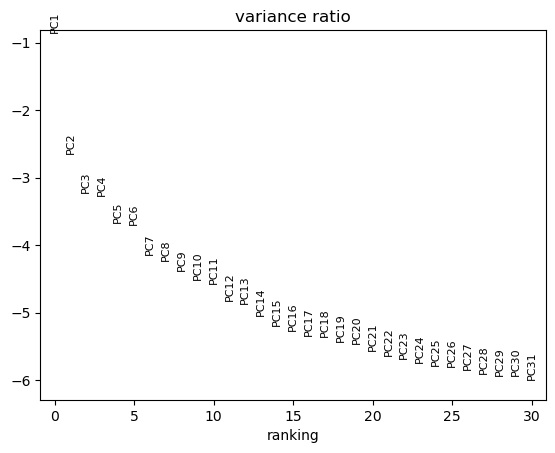

In [22]:
sc.pl.pca_variance_ratio(myadataHV, log=True)

In [23]:
#sc.pl.pca(myadataHV, color='WASH7P')

In [24]:
#sc.pp.neighbors(myadataHV, n_neighbors=30, n_pcs=20)
sc.pp.neighbors(myadataHV)

In [25]:
sc.tl.umap(myadataHV)
#sc.pl.umap(myadataHV, color=['LHCGR'])

In [26]:
sc.tl.leiden(myadataHV)

/tmp/ipykernel_1046/1314464946.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(myadataHV)


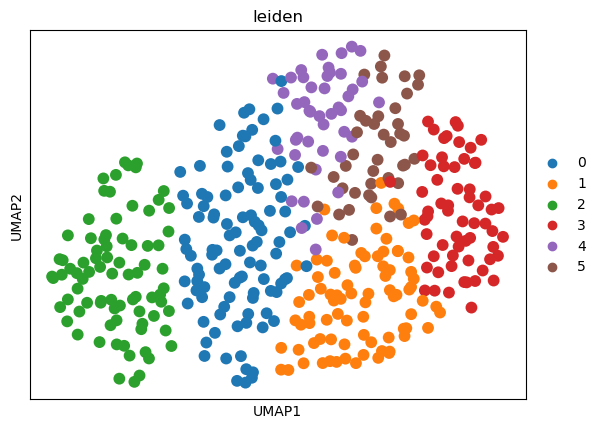

In [27]:
sc.pl.umap(myadataHV, color=['leiden'])

/home/majunyu/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/majunyu/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/majunyu/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/majunyu/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/majunyu/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/majunyu/a

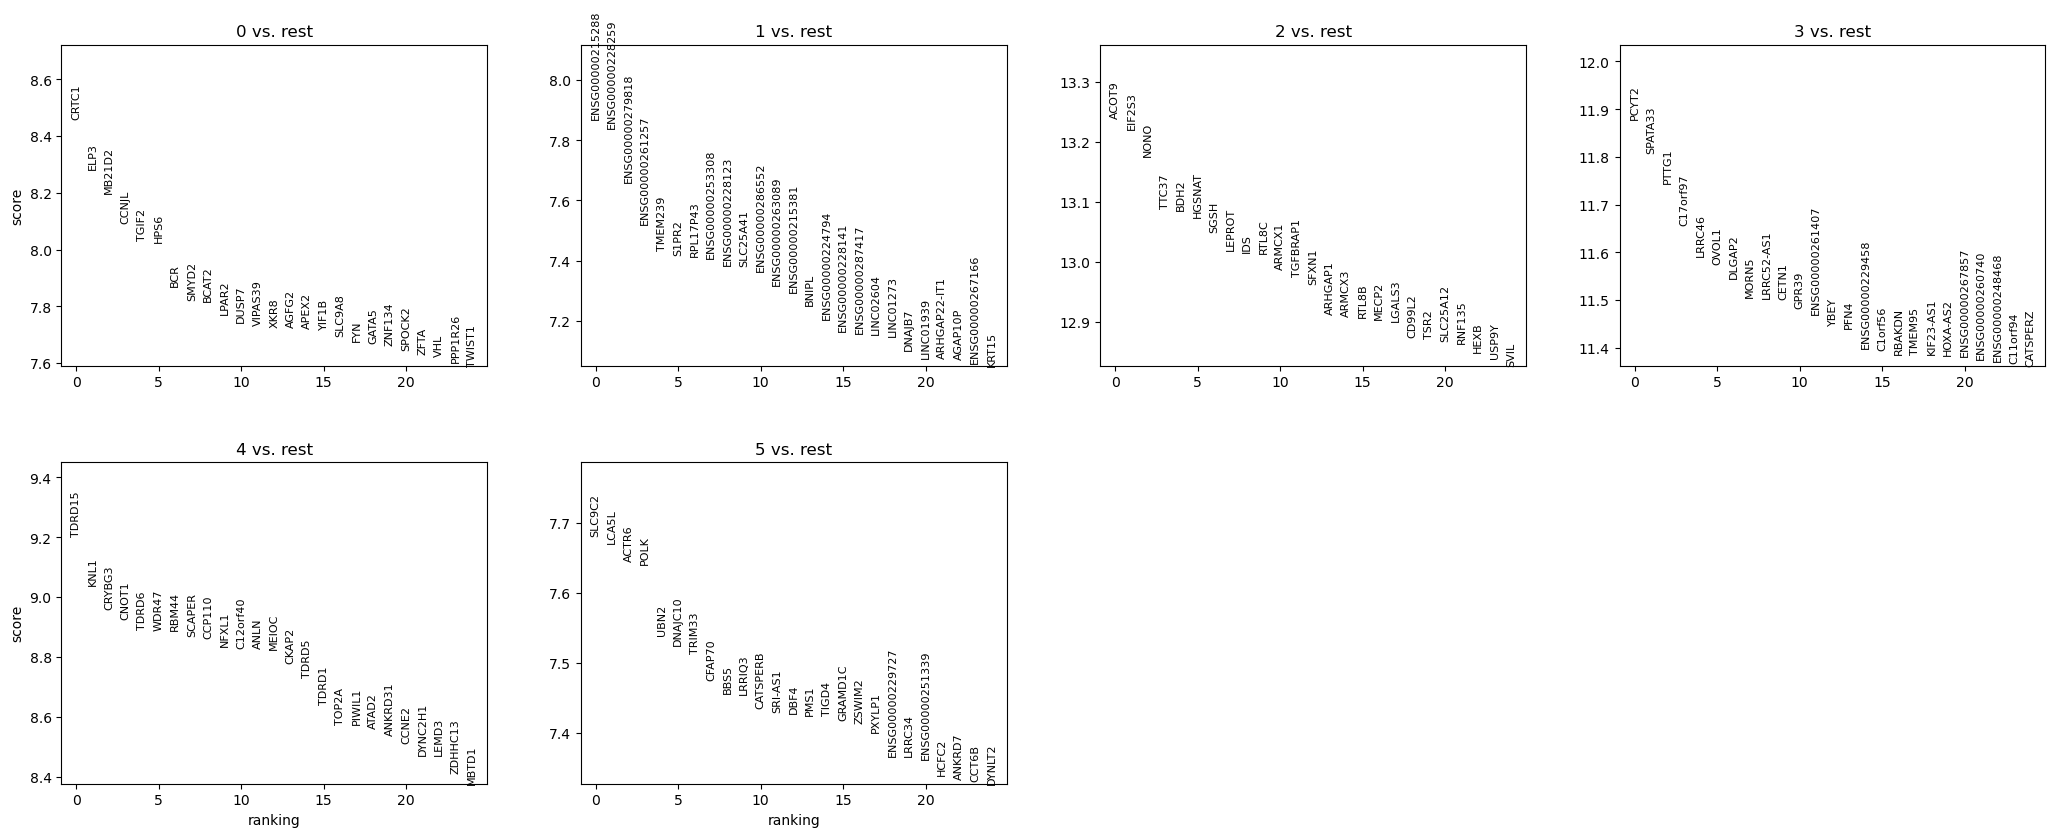

In [28]:
sc.tl.rank_genes_groups(myadataHV, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(myadataHV, n_genes=25, sharey=False)

In [29]:
result = myadataHV.uns['rank_genes_groups']
groups = result['names'].dtype.names
HV = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})
HV.to_csv("./OUTPUT/testis.HV.csv")

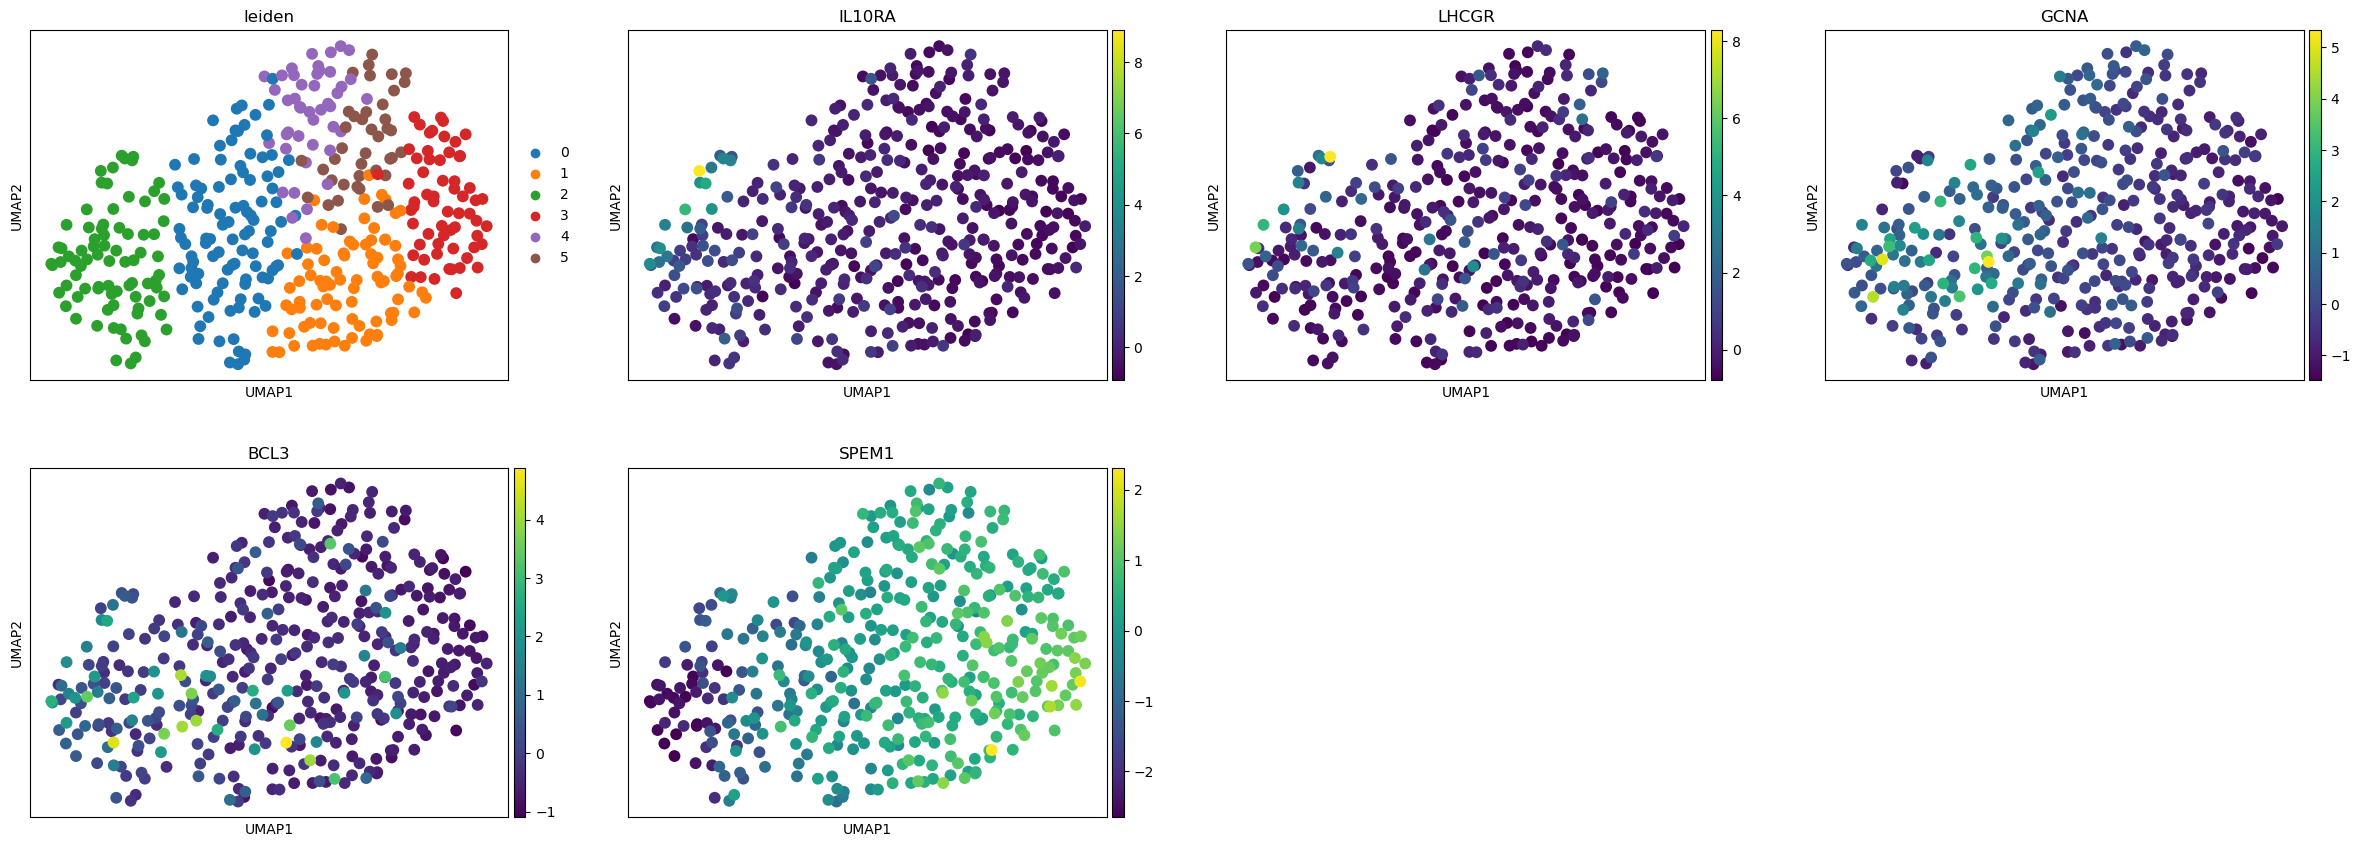

In [30]:
sc.pl.umap(myadataHV, color=['leiden',"IL10RA","LHCGR","GCNA","BCL3","SPEM1"])

In [31]:
#sc.pl.rank_genes_groups_violin(myadataHV, groups='0', n_genes=10)

In [32]:
#sc.pl.rank_genes_groups_violin(myadataHV, groups='1', n_genes=10)

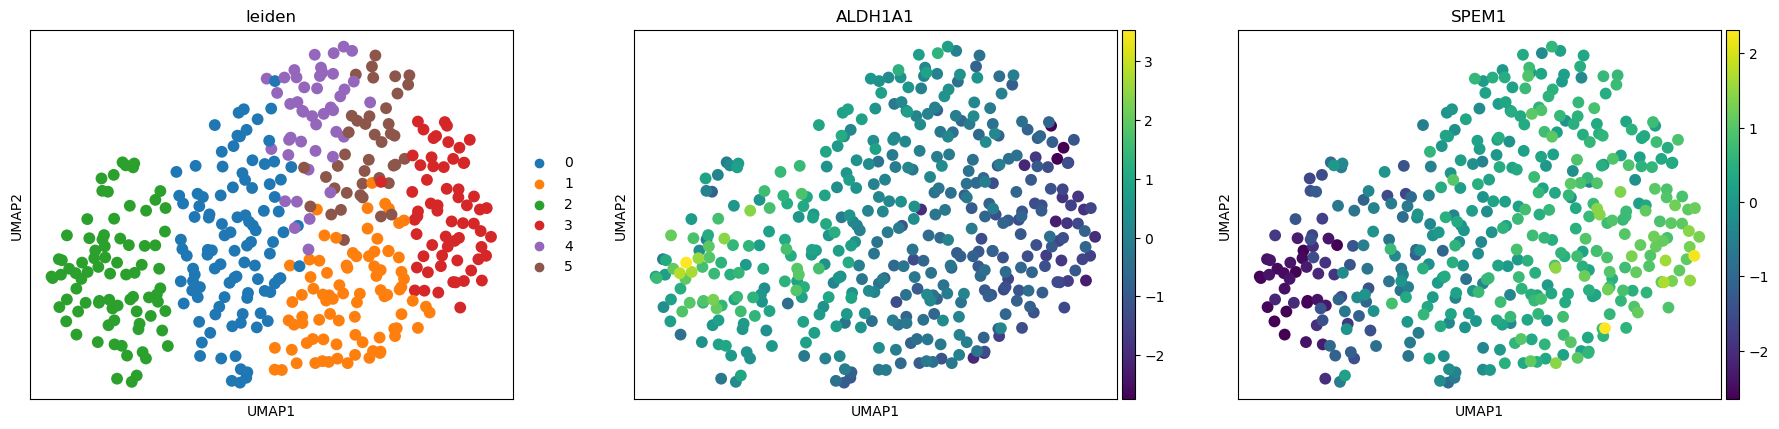

In [33]:
sc.pl.umap(myadataHV, color=['leiden',"ALDH1A1","SPEM1"])

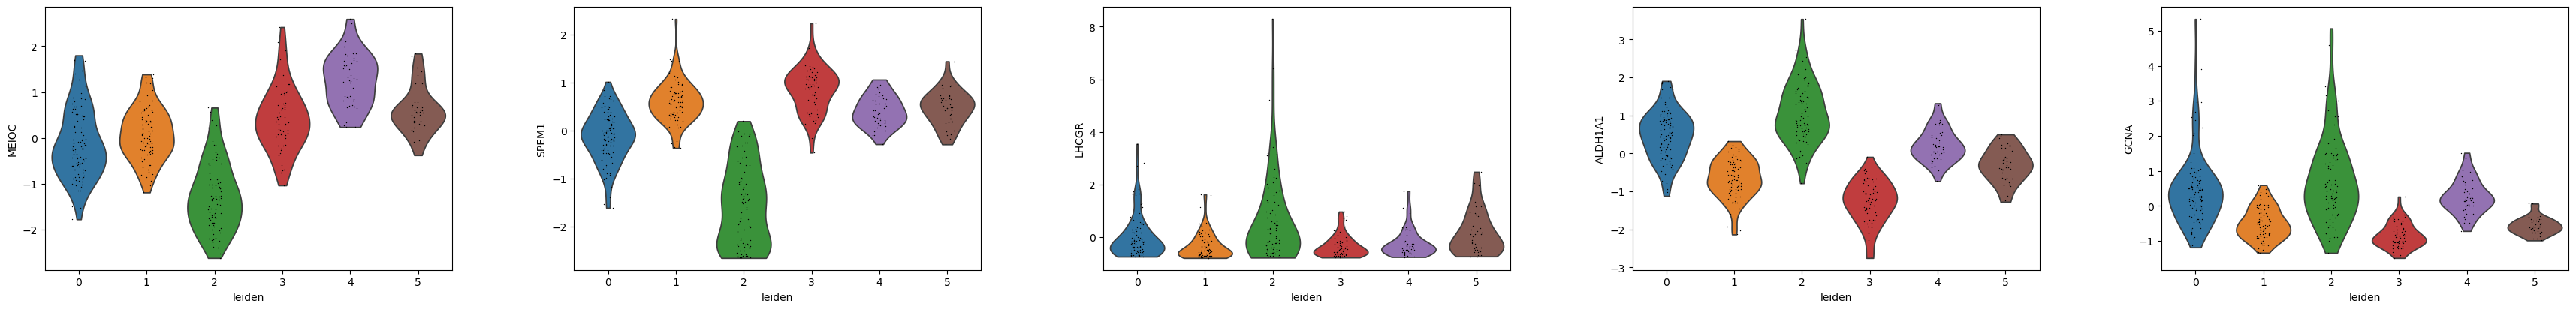

In [34]:
sc.pl.violin(myadataHV, ['MEIOC', 'SPEM1',"LHCGR", 'ALDH1A1',"GCNA"], groupby='leiden')

In [35]:
new_cluster_names = ['T5', 'T2', 'T6', 'T1', 'T4','T3']
myadataHV.rename_categories('leiden', new_cluster_names)

In [36]:
sc.pl.umap(myadataHV, color='leiden',legend_loc='on data',legend_fontsize=15, show=False)
ax = plt.gca()
ax.set_xlabel("UMAP1", fontsize=20)
ax.set_ylabel("UMAP2", fontsize=20)
ax.set_title("leiden", fontsize=25)
ax.tick_params(labelsize=10)
plt.gcf().set_size_inches(5, 5)
plt.savefig('./my_plots/Testis.Leiden.pdf', dpi=300, bbox_inches='tight')
plt.close()

In [37]:
sc.pl.umap(myadataHV, color='ALDH1A1',legend_loc='on data',legend_fontsize=15, show=False)
ax = plt.gca()
ax.set_xlabel("UMAP1", fontsize=20)
ax.set_ylabel("UMAP2", fontsize=20)
ax.set_title("ALDH1A1", fontsize=25,fontstyle="italic")
ax.tick_params(labelsize=10)
plt.gcf().set_size_inches(5, 5)
plt.savefig('./my_plots/Testis.ALDH1A1.pdf', dpi=300, bbox_inches='tight')
plt.close()
sc.pl.umap(myadataHV, color='SPEM2',legend_loc='on data',legend_fontsize=15, show=False)
ax = plt.gca()
ax.set_xlabel("UMAP1", fontsize=20)
ax.set_ylabel("UMAP2", fontsize=20)
ax.set_title("SPEM2", fontsize=25,fontstyle="italic")
ax.tick_params(labelsize=10)
plt.gcf().set_size_inches(5, 5)
plt.savefig('./my_plots/Testis.SPEM2.pdf', dpi=300, bbox_inches='tight')
plt.close()

In [38]:
#new_cluster_names = ['T5', 'T2', 'T6', 'T1', 'T4','T3']
marker_genes = [  'PCYT2', 'SPATA33','TMEM239','BNIPL','SLC9C2','TDRD15','CRTC1','ELP3', 'ACOT9','NONO']

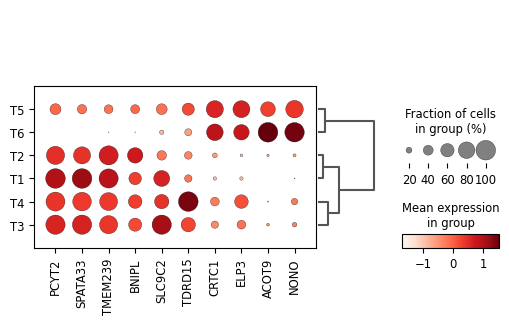

In [39]:
sc.pl.dotplot(myadataHV, marker_genes, groupby='leiden',dendrogram=True)

In [40]:
sc.pl.dotplot(myadataHV, marker_genes, groupby='leiden',dendrogram=True, show=False)
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.gcf().set_size_inches(5, 3)
plt.savefig('./my_plots/Testis.Cluster2.pdf', dpi=300, bbox_inches='tight')
plt.close()

In [41]:
myadataHV

AnnData object with n_obs × n_vars = 414 × 13961
    obs: 'SMPTHNTS', 'SMTSD', 'SUBJID', 'SEX', 'AGE', 'DTHHRDY', 'leiden'
    var: 'Symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [42]:
merge_rules = {
    'Good': ['T1', 'T2'],
    'Poor': ['T5', 'T6'],
    'Other': ['T3','T4'] 
}

In [43]:
myadataHV.obs['TestisAbility'] = myadataHV.obs['leiden'].copy().astype(str)

In [44]:
for new_name, old_clusters in merge_rules.items():
    myadataHV.obs.loc[myadataHV.obs['TestisAbility'].isin(old_clusters), 'TestisAbility'] = new_name

In [45]:
myadataHV.obs.TestisAbility

GTEX-111CU-1726-SM-5EGHM    Other
GTEX-111FC-1926-SM-5GZYC     Good
GTEX-111VG-1926-SM-5GIDO     Good
GTEX-111YS-2026-SM-5EGGL    Other
GTEX-117XS-2026-SM-5GID1    Other
                            ...  
GTEX-ZVZP-2226-SM-57WBF     Other
GTEX-ZY6K-1726-SM-5GZX8      Poor
GTEX-ZYFC-0126-SM-5GIEH      Poor
GTEX-ZYT6-2726-SM-5GICP     Other
GTEX-ZZ64-1126-SM-5GZXY     Other
Name: TestisAbility, Length: 414, dtype: object

In [46]:
target_clusters = ['Good', 'Poor'] 
mask = myadataHV.obs['TestisAbility'].isin(target_clusters)


In [47]:
myadata.obs = myadataHV.obs
myadata.uns = myadataHV.uns
myadata.obsm = myadataHV.obsm
adata_subset = myadata[mask, :].copy()

In [48]:
adata_subset

AnnData object with n_obs × n_vars = 329 × 59033
    obs: 'SMPTHNTS', 'SMTSD', 'SUBJID', 'SEX', 'AGE', 'DTHHRDY', 'leiden', 'TestisAbility'
    var: 'Symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'

In [49]:
set1_colors = plt.cm.Set1.colors[0:2]

sc.pl.umap(adata_subset, color='TestisAbility',
           legend_loc='on data',
           palette=set1_colors,
           legend_fontsize=15, show=False)
ax = plt.gca()
ax.set_xlabel("UMAP1", fontsize=20)
ax.set_ylabel("UMAP2", fontsize=20)
ax.set_title("TestisAbility", fontsize=25)
ax.tick_params(labelsize=10)
plt.gcf().set_size_inches(5, 5)
plt.savefig('./my_plots/Testis.Cluster3.pdf', dpi=300, bbox_inches='tight')
plt.close()

In [50]:
#myadata.obs

In [51]:
TAID = []
TBID = []
T1 = myadataHV[myadataHV.obs.leiden == "T1"].obs.SUBJID.to_list()
T2 = myadataHV[myadataHV.obs.leiden == "T2"].obs.SUBJID.to_list()
T3 = myadataHV[myadataHV.obs.leiden == "T3"].obs.SUBJID.to_list()
T4 = myadataHV[myadataHV.obs.leiden == "T4"].obs.SUBJID.to_list()
T5 = myadataHV[myadataHV.obs.leiden == "T5"].obs.SUBJID.to_list()
T6 = myadataHV[myadataHV.obs.leiden == "T6"].obs.SUBJID.to_list()
TAID = T1+T2
TBID = T5+T6

In [52]:
with open("./OUTPUT/Testis_Tgood_ID.txt", "w") as file:
    for item in TAID:
        # 将列表的每个元素写入文件，并在每个元素后添加一个换行符
        file.write(f"{item}\n")

with open("./OUTPUT/Testis_Tpoor_ID.txt", "w") as file:
    for item in TBID:
        file.write(f"{item}\n")

In [53]:
#AllID = myadata.obs.SUBJID.to_list()
#TAbool = [x in TAID for x in AllID]
#TBbool = [x in TBID for x in AllID]
#myadataTA = myadata[TAbool]
#myadataTB = myadata[TBbool]
#myadataTA.obs

In [54]:
#myadataTA.obs["Cluster"] = ["TA"]*len(TAID)
#myadataTB.obs["Cluster"] = ["TB"]*len(TBID)

In [55]:
#myadataTATB = ad.concat([myadataTA, myadataTB], axis=0)

In [56]:
test_results = de.test.t_test(
    data=adata_subset,                     # AnnData 对象
    grouping=adata_subset.obs["TestisAbility"],  # 分组列（如细胞聚类结果）
    gene_names=adata_subset.var_names      # 基因名
)

In [57]:
deg_table = test_results.summary()

In [58]:
deg_table

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
0,DDX11L1,2.306768e-01,2.960370e-01,0.171843,0.002409,False,False
1,WASH7P,2.638497e-03,4.593036e-03,0.208429,0.049179,False,False
2,MIR6859-1,7.084910e-01,7.614566e-01,0.328403,0.000203,False,False
3,MIR1302-2HG,1.641834e-02,2.621398e-02,-0.395641,0.000656,False,False
4,FAM138A,5.711623e-02,8.395012e-02,-0.575890,0.000119,False,False
...,...,...,...,...,...,...,...
59028,MT-ND6,4.581708e-18,1.701181e-17,0.186904,2.941854,False,False
59029,MT-TE,2.724880e-03,4.737097e-03,0.695908,0.035110,False,False
59030,MT-CYB,1.273464e-25,6.663906e-25,0.093451,5.125678,False,False
59031,MT-TT,8.455289e-01,8.775137e-01,0.049126,0.003318,False,False


In [59]:
#significant_genes = deg_table[(deg_table["qval"] < 0.01) & (abs(deg_table["log2fc"]) > 1) & (deg_table["mean"]>0.05)]
significant_genes = deg_table[(deg_table["qval"] < 0.01) & (abs(deg_table["log2fc"]) > 0.5) & (deg_table["mean"]>0.1)]

In [60]:
significant_genes.shape

(4036, 7)

In [61]:
significant_genes2 = significant_genes.sort_values(by='log2fc')
significant_genes2

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
25231,ENSG00000253380,2.494764e-32,1.850453e-31,-1.599543,0.116266,False,False
32203,ENSG00000254514,2.164940e-39,2.499684e-38,-1.477033,0.230700,False,False
36920,ENSG00000258254,5.752214e-26,3.068114e-25,-1.441137,0.155576,False,False
3684,LMX1A-AS1,8.357376e-37,8.101819e-36,-1.421229,0.123697,False,False
43577,TNP2,5.949281e-34,4.834537e-33,-1.399321,0.257395,False,False
...,...,...,...,...,...,...,...
15988,SELENOP,7.966702e-24,3.824456e-23,1.671930,0.144716,False,False
15966,C7,1.488546e-26,8.189639e-26,1.679108,0.361699,False,False
14006,SPP1,6.703153e-13,1.986374e-12,1.788902,0.112797,False,False
40447,SERPINA3,2.267020e-11,6.270525e-11,1.933217,0.220622,False,False


In [62]:
significant_genes2.to_csv("./OUTPUT/myadata_Tgood_vs_Tpoor.DE.csv")

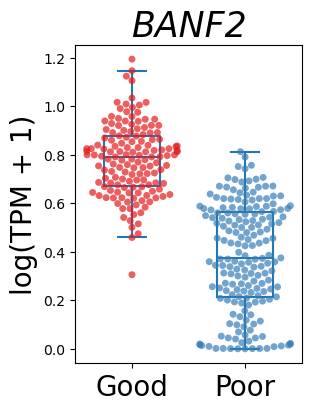

In [63]:
def plotGene(adata,group,Gene,):
    # 将数据转换为 DataFrame
    df = pd.DataFrame({
        'log(TPM + 1)': adata[:,Gene].X.flatten(),  # 获取基因表达数据
        group: adata.obs['TestisAbility']            # 分组信息
    })
    plt.close()
    plt.ioff()
    fig, ax = plt.subplots(figsize=(3, 4), constrained_layout=True)
    # 绘制箱线图
    sns.boxplot(
        data=df,
        x=group,
        y='log(TPM + 1)',
        width=0.5,
        #palette='Set2',       # 配色方案
        fill=False,
        showfliers=False,      # 是否显示离群点
        ax=ax
    )
    sns.swarmplot(
        data=df,
        x=group,
        y="log(TPM + 1)",
        hue="TestisAbility",          # 指定颜色分组列
        palette="Set1",
        size=5,
        alpha=0.7,
        ax=ax
    )

    ax.set_title(Gene, fontstyle="italic", color="black",fontsize=25)
    #plt.xticks(rotation=45)  # 旋转标签

    ax.set_ylabel('log(TPM + 1)',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.set_xlabel('')
    save_path = "/mnt/h/GTEx/my_plots/Testis_"+Gene+".pdf"
    fig.savefig(save_path, dpi=300,transparent=False)
    plt.show(fig)
    plt.close(fig)

plotGene(adata_subset,"TestisAbility","BANF2")

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


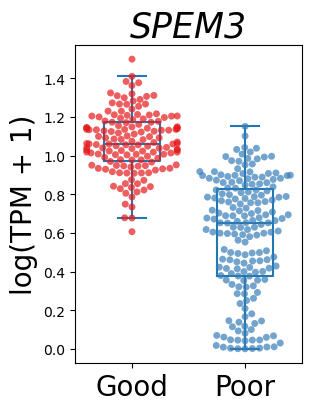

In [64]:
plotGene(adata_subset,"TestisAbility","SPEM3")

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


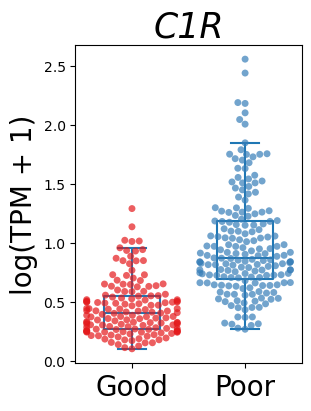

In [65]:
plotGene(adata_subset,"TestisAbility","C1R")

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


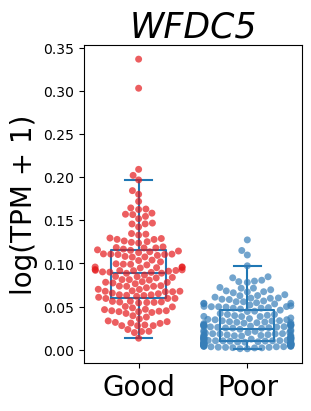

In [66]:
plotGene(adata_subset,"TestisAbility","WFDC5")

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


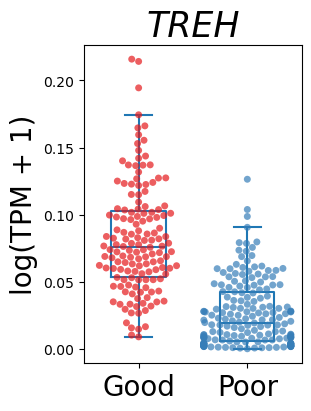

In [67]:
plotGene(adata_subset,"TestisAbility","TREH")

In [68]:
significant_genes2[significant_genes2['log2fc'] > 0]

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
39469,SEC23A,6.407039e-40,7.680028e-39,0.500013,0.141682,False,False
30688,LZTS2,8.616080e-54,4.154584e-52,0.500246,0.357451,False,False
3371,LMNA,2.124468e-55,1.289420e-53,0.500259,0.472715,False,False
3265,TPM3,2.785646e-57,2.287294e-55,0.500277,0.268756,False,False
5923,BIRC6,1.097486e-42,1.644856e-41,0.500924,0.183683,False,False
...,...,...,...,...,...,...,...
15988,SELENOP,7.966702e-24,3.824456e-23,1.671930,0.144716,False,False
15966,C7,1.488546e-26,8.189639e-26,1.679108,0.361699,False,False
14006,SPP1,6.703153e-13,1.986374e-12,1.788902,0.112797,False,False
40447,SERPINA3,2.267020e-11,6.270525e-11,1.933217,0.220622,False,False


/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/cate

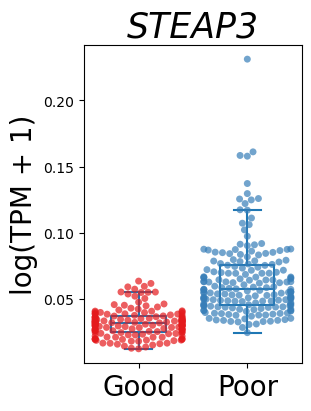

In [69]:
plotGene(adata_subset,"TestisAbility","STEAP3")

In [70]:
significant_genes2[significant_genes2.log2fc > 0]

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
39469,SEC23A,6.407039e-40,7.680028e-39,0.500013,0.141682,False,False
30688,LZTS2,8.616080e-54,4.154584e-52,0.500246,0.357451,False,False
3371,LMNA,2.124468e-55,1.289420e-53,0.500259,0.472715,False,False
3265,TPM3,2.785646e-57,2.287294e-55,0.500277,0.268756,False,False
5923,BIRC6,1.097486e-42,1.644856e-41,0.500924,0.183683,False,False
...,...,...,...,...,...,...,...
15988,SELENOP,7.966702e-24,3.824456e-23,1.671930,0.144716,False,False
15966,C7,1.488546e-26,8.189639e-26,1.679108,0.361699,False,False
14006,SPP1,6.703153e-13,1.986374e-12,1.788902,0.112797,False,False
40447,SERPINA3,2.267020e-11,6.270525e-11,1.933217,0.220622,False,False


In [71]:
significant_genes2[significant_genes2.log2fc < 0]

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
25231,ENSG00000253380,2.494764e-32,1.850453e-31,-1.599543,0.116266,False,False
32203,ENSG00000254514,2.164940e-39,2.499684e-38,-1.477033,0.230700,False,False
36920,ENSG00000258254,5.752214e-26,3.068114e-25,-1.441137,0.155576,False,False
3684,LMX1A-AS1,8.357376e-37,8.101819e-36,-1.421229,0.123697,False,False
43577,TNP2,5.949281e-34,4.834537e-33,-1.399321,0.257395,False,False
...,...,...,...,...,...,...,...
18868,ZKSCAN4,1.944623e-25,1.008673e-24,-0.502053,0.100778,False,False
10186,ZNF35,7.956745e-33,6.062167e-32,-0.502039,0.151828,False,False
10432,DCAF1,8.647513e-34,6.978842e-33,-0.500957,0.730839,False,False
5876,CLIP4,3.588753e-32,2.638071e-31,-0.500396,0.133770,False,False


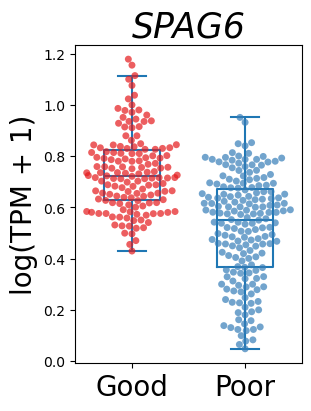

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


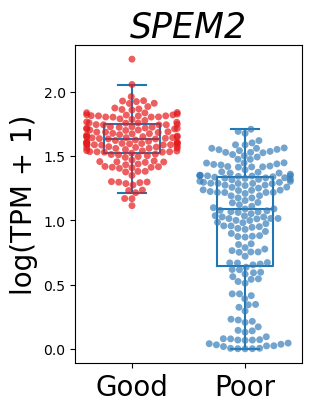

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


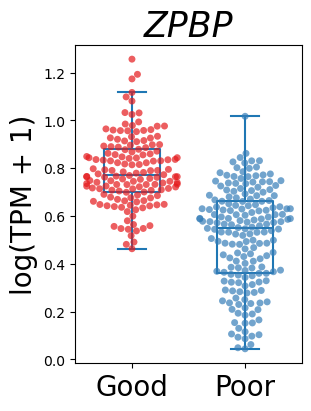

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/cate

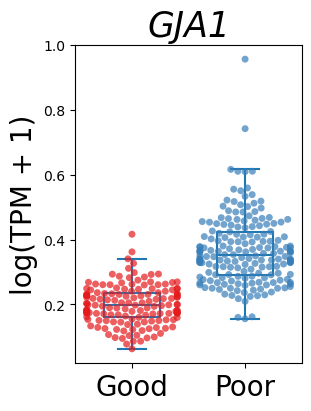

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/cat

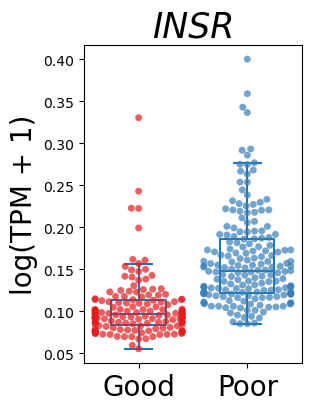

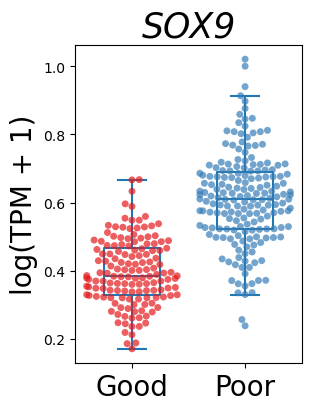

/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/majunyu/anaconda3/lib/python3.12/site-packages/seaborn/categ

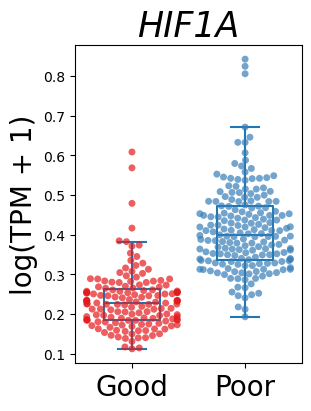

In [72]:
GenesToPlot = ['SPAG6','SPEM2','ZPBP','GJA1','INSR','SOX9','HIF1A']
for i in GenesToPlot:
    plotGene(adata_subset,"TestisAbility",i)

